<b>This notebook will be mainly used for the capstone project.</b>

# 1. Dnipro regions locations

## 1.1 Get the names of the regions

In [4]:
import requests
from bs4 import BeautifulSoup

#### Get the wikipedia page

In [5]:
content = requests.get('https://en.wikipedia.org/wiki/Dnipro')

In [6]:
content.text[:200]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Dnipro - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakF'

#### Get the table with regions

In [7]:
parser = BeautifulSoup(content.text, 'html.parser')

In [8]:
parser.head.title

<title>Dnipro - Wikipedia</title>

In [9]:
regions_table = parser.body.find_all("table", class_ = "wikitable")[0]

In [11]:
regions_elements = regions_table.select('tr')

In [12]:
regions_elements[:2]

[<tr>
 <th>Code
 </th>
 <th>Name of raion
 </th>
 <th>Year of creation
 </th>
 <th>Area (hectares)
 </th>
 <th>Population in 2006
 </th>
 <th>Most important streets and areas
 </th></tr>, <tr>
 <td>1
 </td>
 <td><a href="/wiki/Amur-Nyzhnodniprovskyi_District" title="Amur-Nyzhnodniprovskyi District">Amur-Nyzhnodniprovskyi</a>
 </td>
 <td>1918/1926
 </td>
 <td>7,162.6
 </td>
 <td>154,400
 </td>
 <td><b>Streets:</b> Vulytsia Peredova, Prospekt Manuilyvskyi, Prospekt Slobozhanskyi, Vulytsia Kalynova, Vulytsia Vidchyznyana, Vulytsia Yantarna, Donetske Shose<br/><b>Areas:</b> Amur, Nizhnedneprovsk, Kirillovka, Borzhom, Sultanovka, Sakhalin, Berezanovka, Sonyachnyi Estate, Frunzensky Estate, Livoberezhnyi Estates 1 and 2.
 </td></tr>]

In [13]:
dnipro_regions = [[value.text for value in element.select('td')] for element in regions_elements[1:]]

In [19]:
dnipro_regions[:2]

[['1\n',
  'Amur-Nyzhnodniprovskyi\n',
  '1918/1926\n',
  '7,162.6\n',
  '154,400\n',
  'Streets: Vulytsia Peredova, Prospekt Manuilyvskyi, Prospekt Slobozhanskyi, Vulytsia Kalynova, Vulytsia Vidchyznyana, Vulytsia Yantarna, Donetske ShoseAreas: Amur, Nizhnedneprovsk, Kirillovka, Borzhom, Sultanovka, Sakhalin, Berezanovka, Sonyachnyi Estate, Frunzensky Estate, Livoberezhnyi Estates 1 and 2.\n'],
 ['2\n',
  'Shevchenkivskyi\n',
  '1973\n',
  '3,145.2\n',
  '152,000\n',
  'Streets: Prospekt Bohdana Khmelnytskoho, Vulytsia Mykhaila Hrushevskoho/Vulytsia Sichovykh Striltsiv, Akademik Yavornitskyi Prospekt, Vulytsia Sviatoslava Khorobroho, Zaporizke Shosse, Vulytsia KrotovaAreas: Tsentr, Slobodka, Razvlika-Podstantsiya, 12th Kvartal, Topol Estate 1, 2 and 3, Mirnyi, Danila Nechaya.\n']]

#### Convert to the pandas and leave the names only

In [16]:
import pandas as pd

In [27]:
dnipro_regions_names = pd.DataFrame(dnipro_regions)

In [28]:
dnipro_regions_names.head(6)

,0,1,2,3,4,5
0,1\n,Amur-Nyzhnodniprovskyi\n,1918/1926\n,"7,162.6\n","154,400\n","Streets: Vulytsia Peredova, Prospekt Manuilyvs..."
1,2\n,Shevchenkivskyi\n,1973\n,"3,145.2\n","152,000\n","Streets: Prospekt Bohdana Khmelnytskoho, Vulyt..."
2,3\n,Sobornyi\n,1935\n,"4,409.3\n","169,500\n","Streets: Prospekt Gagarina, Akademik Yavornits..."
3,4\n,Industrialnyi\n,1969\n,"3,267.9\n","132,700\n","Streets: Prospekt Slobozhanskyi, Vulytsia Petr..."
4,5\n,Tsentralnyi\n,1932\n,"1,040.3\n","67,200\n","Streets: Vulytsia Staryi Shlyakh, Akademik Yav..."
5,6\n,Chechelivskyi\n,1933\n,"3,589.7\n","120,600\n","Vulytsia Robitnycha, Prospekt Nigoyana, Prospe..."


In [29]:
dnipro_regions_names = dnipro_regions_names[1]

In [34]:
dnipro_regions_names = dnipro_regions_names.str.replace('\n', '').to_frame()
dnipro_regions_names.columns = ['Region']

In [35]:
dnipro_regions_names

,Region
0,Amur-Nyzhnodniprovskyi
1,Shevchenkivskyi
2,Sobornyi
3,Industrialnyi
4,Tsentralnyi
5,Chechelivskyi
6,Novokodatskyi
7,Samarskyi


## 1.2 Get the geolocations of the regions

In [26]:
conda install -c conda-forge geopy

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Installed\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                        4.8.0-py37_1 --> 4.8.2-py37_0




conda-4.8.2          | 3.0 MB    |            |   0% 
conda-4.8.2          | 3.0 MB    |            |   1% 
conda-4.8.2          | 3.0 MB    | #5         |  16% 
conda-4.8.2          | 3.0 MB    | ##8        |  28% 
conda-4.8.2          | 3.0 MB    | ######6    |  67% 
conda-4.8.2          | 3.0 MB    | ########8  |  88% 
conda-4.8.2          | 3.0 MB    | ########## | 100% 

In [36]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [37]:
geolocator = Nominatim(user_agent="dnipro",timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

In [39]:
longitudes = []
latitudes = []
for region in dnipro_regions_names['Region']:
    location = geocode('{}, Dnipro'.format(region))
    longitudes.append(location.longitude)
    latitudes.append(location.latitude)
print(longitudes)
print(latitudes)

[35.0417833, 35.0417711, 35.05869960452452, 35.07843334911329, 35.02400959487791, 34.98195743754229, 34.946035218638535, 35.158380006960655]
[48.4945636, 48.4680221, 48.463425, 48.52146375, 48.45939115, 48.4385571, 48.4856885, 48.53468705]


In [40]:
dnipro_regions_names['Longitude'] = longitudes
dnipro_regions_names['Latitude'] = latitudes
dnipro_regions_names

,Region,Longitude,Latitude
0,Amur-Nyzhnodniprovskyi,35.041783,48.494564
1,Shevchenkivskyi,35.041771,48.468022
2,Sobornyi,35.058700,48.463425
3,Industrialnyi,35.078433,48.521464
4,Tsentralnyi,35.024010,48.459391
5,Chechelivskyi,34.981957,48.438557
6,Novokodatskyi,34.946035,48.485689
7,Samarskyi,35.158380,48.534687


## 1.3 Visualize the regions

In [41]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

# All requested packages already installed.



In [42]:
import folium

In [45]:
map_dnirpo_regions = folium.Map(location=[latitudes[0], longitudes[0]], zoom_start=12)

for lat, lng, region in zip(dnipro_regions_names['Latitude'],
                            dnipro_regions_names['Longitude'],
                            dnipro_regions_names['Region']):
    label = folium.Popup(region, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dnirpo_regions)

In [46]:
map_dnirpo_regions

# 2. Get foursquare venues for each region

In [194]:
CLIENT_ID = 'H2SID3VSTK5L101KYA3NVCRHFESPHCYIULK5CK3PGI1GGJ1D' # your Foursquare ID
CLIENT_SECRET = 'NKCDE13L2NX5IWWD5MSCRJH0GIFL5DJWGBUVFQFIVHDXOBF5' # your Foursquare Secret
VERSION = '20200126' # Foursquare API version

## 2.1 Get all the venues

In [84]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            3000, 
            200)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            [el['name'] for el in v['venue']['categories']]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Region', 
                  'Region Latitude', 
                  'Region Longitude', 
                  'Venue', 
                  'Venue ID', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Primary Category',
                  'Venue Categories']
    
    return(nearby_venues)

In [85]:
dnipro_venues = getNearbyVenues(names=dnipro_regions_names['Region'],
                                latitudes=dnipro_regions_names['Latitude'],
                                longitudes=dnipro_regions_names['Longitude']
                                  )

Amur-Nyzhnodniprovskyi
Shevchenkivskyi
Sobornyi
Industrialnyi
Tsentralnyi
Chechelivskyi
Novokodatskyi
Samarskyi


In [86]:
print(dnipro_venues.shape)
dnipro_venues.head()

(580, 9)


,Region,Region Latitude,Region Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Primary Category,Venue Categories
0,Amur-Nyzhnodniprovskyi,48.494564,35.041783,"Набережна на ж/м ""Сонячний""",4ead591a490170218c3e8eac,48.482077,35.064039,Waterfront,[Waterfront]
1,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Джайпур,4e75e0861495be51714f2764,48.474490,35.028832,Gym / Fitness Center,[Gym / Fitness Center]
2,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Dance Republic,55a7a750498e39b5deec0a05,48.477264,35.024195,Dance Studio,[Dance Studio]
3,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Лазерхаус,5502f0e7498e26f68f81b356,48.470317,35.043921,Health & Beauty Service,[Health & Beauty Service]
4,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Fozzy / Фоззи,52a6c1bc11d2f10095c778b6,48.483839,35.063883,Supermarket,[Supermarket]


In [87]:
print('There are {} uniques categories.'.format(len(dnipro_venues['Venue Primary Category'].unique())))

There are 136 uniques categories.


## 2.2 Filter food venues only

In [88]:
dnipro_venues['Venue Primary Category'].unique()

array(['Waterfront', 'Gym / Fitness Center', 'Dance Studio',
       'Health & Beauty Service', 'Supermarket', 'Fountain',
       'Scenic Lookout', 'French Restaurant', 'Board Shop', 'Arcade',
       'Coffee Shop', 'Modern European Restaurant', 'Sushi Restaurant',
       'Fast Food Restaurant', 'Gym', 'Grocery Store',
       'Furniture / Home Store', 'Italian Restaurant', 'Pharmacy',
       'Nightclub', 'Park', 'Hostel', 'Hotel', 'Café', 'Beach',
       'Beer Store', 'Toy / Game Store', 'Automotive Shop', 'Pool',
       'BBQ Joint', 'Sculpture Garden', 'Seafood Restaurant',
       'Caucasian Restaurant', 'Restaurant', 'Theme Park',
       'Shopping Mall', 'Spa', 'Bakery', 'Cosmetics Shop',
       'Clothing Store', 'Bus Station', 'Concert Hall', 'Rock Club',
       'Comfort Food Restaurant', 'Pizza Place', 'Bar', 'Burger Joint',
       'Farmers Market', 'Electronics Store', 'Train Station',
       'Convenience Store', 'Jewelry Store', 'Wine Shop', 'Tea Room',
       'Art Museum', 'Desser

In [89]:
venues_filter_food = ['Supermarket', 'French Restaurant', 'Coffee Shop', 'Modern European Restaurant', 'Sushi Restaurant',
                      'Fast Food Restaurant', 'Grocery Store', 'Italian Restaurant', 'Café', 'Beer Store', 'BBQ Joint',
                      'Seafood Restaurant', 'Caucasian Restaurant', 'Restaurant', 'Bakery', 'Comfort Food Restaurant',
                      'Pizza Place', 'Bar', 'Burger Joint', 'Dessert Shop', 'Tea Room', 'Cocktail Bar',
                      'Vegetarian / Vegan Restaurant','Irish Pub', 'Soup Place', 'Pub', 'Eastern European Restaurant',
                      'Gastropub', 'Ramen Restaurant', 'Food Court', 'Middle Eastern Restaurant', 'Food Truck',
                      'Theme Restaurant', 'Juice Bar', 'Asian Restaurant', 'Ukrainian Restaurant', 'Food & Drink Shop']



In [180]:
dnipro_venues_food = dnipro_venues.loc[dnipro_venues['Venue Primary Category'].isin(venues_filter_food)].drop_duplicates(subset = ['Venue ID'])

In [181]:
dnipro_venues_food.shape

(166, 9)

In [182]:
dnipro_venues_food.head()

,Region,Region Latitude,Region Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Primary Category,Venue Categories
4,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Fozzy / Фоззи,52a6c1bc11d2f10095c778b6,48.483839,35.063883,Supermarket,[Supermarket]
7,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Pa-Si-Ju,558cfeb5498e6a17da7dfe6f,48.473249,35.029125,French Restaurant,[French Restaurant]
11,Amur-Nyzhnodniprovskyi,48.494564,35.041783,HAVE Coffee,5a2fa09e69e77b22f361c493,48.469386,35.038928,Coffee Shop,[Coffee Shop]
13,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Confetti | Конфетти,5bbefb002aff31002b5f9d9b,48.483092,35.063147,Modern European Restaurant,[Modern European Restaurant]
14,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Суши Набухико,5691301f498e3250c1f2ac16,48.469579,35.052557,Sushi Restaurant,[Sushi Restaurant]


## 2.3 Visualize venues

In [125]:
map_venues_food = folium.Map(location=[latitudes[0], longitudes[0]], zoom_start=12)

import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

colors_array = cm.rainbow(np.linspace(0, 1, dnipro_regions_names.shape[0]))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lng, name, region in zip(dnipro_venues_food['Venue Latitude'],
                                  dnipro_venues_food['Venue Longitude'],
                                  dnipro_venues_food['Venue'],
                                  dnipro_venues_food['Region']):
    label = folium.Popup('{}, {}'.format(name, region), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup= label,
        color=rainbow[dnipro_regions_names.index[dnipro_regions_names['Region'] == region].tolist()[0]],
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues_food)

In [126]:
map_venues_food

## 2.4 Number of venues by region

In [105]:
#number of venues for each region
grouped_venues = dnipro_venues_food.groupby('Region').count()['Venue']
grouped_venues

Region
Amur-Nyzhnodniprovskyi    44
Chechelivskyi             23
Industrialnyi             18
Novokodatskyi             15
Shevchenkivskyi           46
Sobornyi                  10
Tsentralnyi               10
Name: Venue, dtype: int64

In [121]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

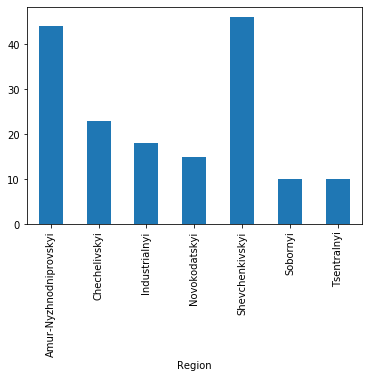

In [122]:
grouped_venues.plot.bar()

#### The most frequent venue categories

In [106]:
# one hot encoding
dnipro_onehot = pd.get_dummies(dnipro_venues_food[['Venue Primary Category']], prefix="", prefix_sep="")
dnipro_onehot['Region'] = dnipro_venues_food['Region'] 

fixed_columns = [dnipro_onehot.columns[-1]] + list(dnipro_onehot.columns[:-1])
dnipro_onehot = dnipro_onehot[fixed_columns]

dnipro_onehot.shape

(166, 38)

In [107]:
dnipro_onehot.head()

,Region,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Store,Burger Joint,Café,Caucasian Restaurant,Cocktail Bar,...,Ramen Restaurant,Restaurant,Seafood Restaurant,Soup Place,Supermarket,Sushi Restaurant,Tea Room,Theme Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant
4,Amur-Nyzhnodniprovskyi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,Amur-Nyzhnodniprovskyi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Amur-Nyzhnodniprovskyi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Amur-Nyzhnodniprovskyi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Amur-Nyzhnodniprovskyi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### TOP-5 categories

In [114]:
#Get top-5 venue categories

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

dnipro_grouped_top_5 = dnipro_onehot.groupby('Region').sum().reset_index()

columns = ['Region']
columns.extend(['#{} Most common Venue'.format(i) for i in range(1,6)])

# create a new dataframe
dnipro_grouped_top_5_sorted = pd.DataFrame(columns=columns)
dnipro_grouped_top_5_sorted['Region'] = dnipro_grouped_top_5['Region']

for ind in np.arange(dnipro_grouped_top_5.shape[0]):
    dnipro_grouped_top_5_sorted.iloc[ind, 1:] = return_most_common_venues(dnipro_grouped_top_5.iloc[ind, :], 5)
    
dnipro_grouped_top_5_sorted

,Region,#1 Most common Venue,#2 Most common Venue,#3 Most common Venue,#4 Most common Venue,#5 Most common Venue
0,Amur-Nyzhnodniprovskyi,Coffee Shop,Café,Supermarket,Bakery,Beer Store
1,Chechelivskyi,Café,Coffee Shop,Supermarket,Grocery Store,Restaurant
2,Industrialnyi,Bakery,Coffee Shop,Grocery Store,Eastern European Restaurant,Restaurant
3,Novokodatskyi,Supermarket,Grocery Store,Café,BBQ Joint,Bakery
4,Shevchenkivskyi,Coffee Shop,Bakery,Caucasian Restaurant,Modern European Restaurant,Gastropub
5,Sobornyi,Restaurant,Coffee Shop,Cocktail Bar,Tea Room,Irish Pub
6,Tsentralnyi,Coffee Shop,Restaurant,Café,Vegetarian / Vegan Restaurant,Tea Room


# 3. Get venues details

In [183]:
dnipro_venues_food = dnipro_venues_food.reset_index(drop=True)

In [184]:
dnipro_venues_food.drop(columns=['Venue Categories'], inplace=True)

In [185]:
dnipro_venues_food.head()

,Region,Region Latitude,Region Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Primary Category
0,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Fozzy / Фоззи,52a6c1bc11d2f10095c778b6,48.483839,35.063883,Supermarket
1,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Pa-Si-Ju,558cfeb5498e6a17da7dfe6f,48.473249,35.029125,French Restaurant
2,Amur-Nyzhnodniprovskyi,48.494564,35.041783,HAVE Coffee,5a2fa09e69e77b22f361c493,48.469386,35.038928,Coffee Shop
3,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Confetti | Конфетти,5bbefb002aff31002b5f9d9b,48.483092,35.063147,Modern European Restaurant
4,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Суши Набухико,5691301f498e3250c1f2ac16,48.469579,35.052557,Sushi Restaurant


In [134]:
import json

In [205]:
def getVenuesDetails(ids):
    venues_list=[]
    for venue_id in ids:
        # create the API request URL
        url_venue = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
                    venue_id,
                    CLIENT_ID, 
                    CLIENT_SECRET, 
                    VERSION)
        # make the GET request
        venue_results = requests.get(url_venue).json()["response"]['venue']
        
        # return only relevant information for each nearby venue
        venues_list.append([
            venue_results['location']['formattedAddress'],
            [el['name'] for el in venue_results['categories']],
            venue_results['likes']['count'] if 'likes' in venue_results else 0, 
            venue_results['rating'] if 'rating' in venue_results else 0,
            venue_results['hours']['isOpen'] if 'hours' in venue_results else np.nan
        ])

    venues_table = pd.DataFrame(venues_list)
    venues_table.columns = ['Venue Address', 
                  'Venue Categories',  
                  'Venue Likes',
                  'Venue Rating',
                  'Venue Is Open']
    
    return venues_table

In [206]:
venues_table = getVenuesDetails(dnipro_venues_food['Venue ID'].values)


In [207]:
venues_table.head()

,Venue Address,Venue Categories,Venue Likes,Venue Rating,Venue Is Open
0,"[ТРЦ ""Вавілон"" (вул. Маршала Малиновського, 2)...","[Supermarket, Grocery Store]",374,7.9,True
1,"[просп. Дмитра Яворницького, 90, Дніпро, Україна]",[French Restaurant],231,8.3,True
2,"[просп. Дмитра Яворницького, 70а (вул. Юліуша ...",[Coffee Shop],80,8.4,False
3,"[ул. Малиновского, 2, Дніпро, Україна]",[Modern European Restaurant],8,7.6,NaN
4,"[вул. Січеславська Набережна, 31-А, Дніпро, Ук...",[Sushi Restaurant],42,8.2,False


In [211]:
dnipro_venues_food.shape

(166, 8)

In [209]:
dnipro_venues_updated = pd.concat([dnipro_venues_food, venues_table], axis=1, join='outer')


In [210]:
dnipro_venues_updated.head()

,Region,Region Latitude,Region Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Primary Category,Venue Address,Venue Categories,Venue Likes,Venue Rating,Venue Is Open
0,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Fozzy / Фоззи,52a6c1bc11d2f10095c778b6,48.483839,35.063883,Supermarket,"[ТРЦ ""Вавілон"" (вул. Маршала Малиновського, 2)...","[Supermarket, Grocery Store]",374,7.9,True
1,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Pa-Si-Ju,558cfeb5498e6a17da7dfe6f,48.473249,35.029125,French Restaurant,"[просп. Дмитра Яворницького, 90, Дніпро, Україна]",[French Restaurant],231,8.3,True
2,Amur-Nyzhnodniprovskyi,48.494564,35.041783,HAVE Coffee,5a2fa09e69e77b22f361c493,48.469386,35.038928,Coffee Shop,"[просп. Дмитра Яворницького, 70а (вул. Юліуша ...",[Coffee Shop],80,8.4,False
3,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Confetti | Конфетти,5bbefb002aff31002b5f9d9b,48.483092,35.063147,Modern European Restaurant,"[ул. Малиновского, 2, Дніпро, Україна]",[Modern European Restaurant],8,7.6,NaN
4,Amur-Nyzhnodniprovskyi,48.494564,35.041783,Суши Набухико,5691301f498e3250c1f2ac16,48.469579,35.052557,Sushi Restaurant,"[вул. Січеславська Набережна, 31-А, Дніпро, Ук...",[Sushi Restaurant],42,8.2,False


# 4. Recommendation system

## 4.1 Data preperation

In [212]:
k_prepared_venues = dnipro_venues_updated.copy()

In [213]:
k_prepared_venues.drop(columns=['Venue', 'Venue Address', 'Region Latitude', 'Region Longitude', 'Venue Primary Category'],
                       inplace=True)

In [214]:
k_prepared_venues.head()

,Region,Venue ID,Venue Latitude,Venue Longitude,Venue Categories,Venue Likes,Venue Rating,Venue Is Open
0,Amur-Nyzhnodniprovskyi,52a6c1bc11d2f10095c778b6,48.483839,35.063883,"[Supermarket, Grocery Store]",374,7.9,True
1,Amur-Nyzhnodniprovskyi,558cfeb5498e6a17da7dfe6f,48.473249,35.029125,[French Restaurant],231,8.3,True
2,Amur-Nyzhnodniprovskyi,5a2fa09e69e77b22f361c493,48.469386,35.038928,[Coffee Shop],80,8.4,False
3,Amur-Nyzhnodniprovskyi,5bbefb002aff31002b5f9d9b,48.483092,35.063147,[Modern European Restaurant],8,7.6,NaN
4,Amur-Nyzhnodniprovskyi,5691301f498e3250c1f2ac16,48.469579,35.052557,[Sushi Restaurant],42,8.2,False


### Convert latitude and longitude into the distance from my location

In [215]:
import geocoder
g = geocoder.ip('me')
print(g.latlng)

[48.4593, 35.0386]


In [216]:
from geopy import distance

In [223]:
def calc_distance(row):
    return distance.distance(g.latlng, (row['Venue Latitude'], row['Venue Longitude'])).km

In [224]:
k_prepared_venues['Distance'] = k_prepared_venues.apply(calc_distance, axis=1)

In [226]:
k_prepared_venues.drop(columns=['Venue Latitude', 'Venue Longitude'], inplace=True)

In [227]:
k_prepared_venues.head()

,Region,Venue ID,Venue Categories,Venue Likes,Venue Rating,Venue Is Open,Distance
0,Amur-Nyzhnodniprovskyi,52a6c1bc11d2f10095c778b6,"[Supermarket, Grocery Store]",374,7.9,True,3.307693
1,Amur-Nyzhnodniprovskyi,558cfeb5498e6a17da7dfe6f,[French Restaurant],231,8.3,True,1.702071
2,Amur-Nyzhnodniprovskyi,5a2fa09e69e77b22f361c493,[Coffee Shop],80,8.4,False,1.121841
3,Amur-Nyzhnodniprovskyi,5bbefb002aff31002b5f9d9b,[Modern European Restaurant],8,7.6,NaN,3.208433
4,Amur-Nyzhnodniprovskyi,5691301f498e3250c1f2ac16,[Sushi Restaurant],42,8.2,False,1.540025


### Turn venue categories into the set of features

In [229]:
venues_features = pd.get_dummies(dnipro_venues_updated[['Venue Primary Category']], prefix="", prefix_sep="")

In [235]:
for index, row in k_prepared_venues.iterrows():
    for cat in row['Venue Categories']:
        if not cat in venues_features.columns:
            venues_features[cat] = 0
    venues_features.loc[index, row['Venue Categories']] = 1

In [253]:
venues_features['ID'] = dnipro_venues_updated['Venue ID']

In [254]:
venues_features.head()

,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Store,Burger Joint,Café,Caucasian Restaurant,Cocktail Bar,Coffee Shop,...,Breakfast Spot,Tailor Shop,Steakhouse,Noodle House,Wine Bar,Hotel,Shopping Mall,Convenience Store,Venue Is Open,ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,52a6c1bc11d2f10095c778b6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,558cfeb5498e6a17da7dfe6f
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5a2fa09e69e77b22f361c493
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5bbefb002aff31002b5f9d9b
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5691301f498e3250c1f2ac16


### Add normalized other columns

In [244]:
k_prepared_venues['Venue Is Open'] = k_prepared_venues['Venue Is Open'].apply(lambda x: 1 if x else 0)

In [258]:
k_prepared_venues = pd.concat([k_prepared_venues, venues_features], axis = 1)

,Region,Venue ID,Venue Categories,Venue Likes,Venue Rating,Venue Is Open,Distance,Asian Restaurant,BBQ Joint,Bakery,...,Breakfast Spot,Tailor Shop,Steakhouse,Noodle House,Wine Bar,Hotel,Shopping Mall,Convenience Store,Venue Is Open,ID
0,Amur-Nyzhnodniprovskyi,52a6c1bc11d2f10095c778b6,"[Supermarket, Grocery Store]",374,7.9,1,3.307693,0,0,0,...,0,0,0,0,0,0,0,0,1,52a6c1bc11d2f10095c778b6
1,Amur-Nyzhnodniprovskyi,558cfeb5498e6a17da7dfe6f,[French Restaurant],231,8.3,1,1.702071,0,0,0,...,0,0,0,0,0,0,0,0,1,558cfeb5498e6a17da7dfe6f
2,Amur-Nyzhnodniprovskyi,5a2fa09e69e77b22f361c493,[Coffee Shop],80,8.4,0,1.121841,0,0,0,...,0,0,0,0,0,0,0,0,0,5a2fa09e69e77b22f361c493
3,Amur-Nyzhnodniprovskyi,5bbefb002aff31002b5f9d9b,[Modern European Restaurant],8,7.6,1,3.208433,0,0,0,...,0,0,0,0,0,0,0,0,1,5bbefb002aff31002b5f9d9b
4,Amur-Nyzhnodniprovskyi,5691301f498e3250c1f2ac16,[Sushi Restaurant],42,8.2,0,1.540025,0,0,0,...,0,0,0,0,0,0,0,0,0,5691301f498e3250c1f2ac16


In [268]:
k_prepared_venues = k_prepared_venues.iloc[:,:-1]
k_prepared_venues.head()

,Region,Venue ID,Venue Categories,Venue Likes,Venue Rating,Venue Is Open,Distance,Asian Restaurant,BBQ Joint,Bakery,...,Bistro,Miscellaneous Shop,Breakfast Spot,Tailor Shop,Steakhouse,Noodle House,Wine Bar,Hotel,Shopping Mall,Convenience Store
0,Amur-Nyzhnodniprovskyi,52a6c1bc11d2f10095c778b6,"[Supermarket, Grocery Store]",374,7.9,1,3.307693,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amur-Nyzhnodniprovskyi,558cfeb5498e6a17da7dfe6f,[French Restaurant],231,8.3,1,1.702071,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amur-Nyzhnodniprovskyi,5a2fa09e69e77b22f361c493,[Coffee Shop],80,8.4,0,1.121841,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amur-Nyzhnodniprovskyi,5bbefb002aff31002b5f9d9b,[Modern European Restaurant],8,7.6,1,3.208433,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amur-Nyzhnodniprovskyi,5691301f498e3250c1f2ac16,[Sushi Restaurant],42,8.2,0,1.540025,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
from sklearn import preprocessing

In [269]:
X = k_prepared_venues[k_prepared_venues.columns[3:]]

In [270]:
k_prepared_venues[k_prepared_venues.columns[3:]] = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [271]:
k_prepared_venues.head()

,Region,Venue ID,Venue Categories,Venue Likes,Venue Rating,Venue Is Open,Distance,Asian Restaurant,BBQ Joint,Bakery,...,Bistro,Miscellaneous Shop,Breakfast Spot,Tailor Shop,Steakhouse,Noodle House,Wine Bar,Hotel,Shopping Mall,Convenience Store
0,Amur-Nyzhnodniprovskyi,52a6c1bc11d2f10095c778b6,"[Supermarket, Grocery Store]",1.045235,0.518050,0.544862,-0.061479,-0.07785,-0.209822,-0.279145,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
1,Amur-Nyzhnodniprovskyi,558cfeb5498e6a17da7dfe6f,[French Restaurant],0.461826,0.761321,0.544862,-0.667647,-0.07785,-0.209822,-0.279145,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
2,Amur-Nyzhnodniprovskyi,5a2fa09e69e77b22f361c493,[Coffee Shop],-0.154221,0.822139,-1.835326,-0.886701,-0.07785,-0.209822,-0.279145,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
3,Amur-Nyzhnodniprovskyi,5bbefb002aff31002b5f9d9b,[Modern European Restaurant],-0.447965,0.335597,0.544862,-0.098953,-0.07785,-0.209822,-0.279145,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
4,Amur-Nyzhnodniprovskyi,5691301f498e3250c1f2ac16,[Sushi Restaurant],-0.309252,0.700503,-1.835326,-0.728824,-0.07785,-0.209822,-0.279145,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785


In [272]:
k_prepared_venues.drop(columns=['Venue Categories'], inplace=True)

In [273]:
k_prepared_venues.head()

,Region,Venue ID,Venue Likes,Venue Rating,Venue Is Open,Distance,Asian Restaurant,BBQ Joint,Bakery,Bar,...,Bistro,Miscellaneous Shop,Breakfast Spot,Tailor Shop,Steakhouse,Noodle House,Wine Bar,Hotel,Shopping Mall,Convenience Store
0,Amur-Nyzhnodniprovskyi,52a6c1bc11d2f10095c778b6,1.045235,0.518050,0.544862,-0.061479,-0.07785,-0.209822,-0.279145,-0.135665,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
1,Amur-Nyzhnodniprovskyi,558cfeb5498e6a17da7dfe6f,0.461826,0.761321,0.544862,-0.667647,-0.07785,-0.209822,-0.279145,-0.135665,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
2,Amur-Nyzhnodniprovskyi,5a2fa09e69e77b22f361c493,-0.154221,0.822139,-1.835326,-0.886701,-0.07785,-0.209822,-0.279145,-0.135665,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
3,Amur-Nyzhnodniprovskyi,5bbefb002aff31002b5f9d9b,-0.447965,0.335597,0.544862,-0.098953,-0.07785,-0.209822,-0.279145,-0.135665,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785
4,Amur-Nyzhnodniprovskyi,5691301f498e3250c1f2ac16,-0.309252,0.700503,-1.835326,-0.728824,-0.07785,-0.209822,-0.279145,-0.135665,...,-0.07785,-0.110432,-0.110432,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785,-0.07785


### Find the most fitting venue

In [303]:
#the most number of likes, the highest rating, opened, nearest, any location
user_data = [X['Venue Likes'].max(), 10, 1, 0]
user_data.extend([0 for el in k_prepared_venues.columns[6:]])
user_data = pd.DataFrame([user_data])

In [305]:
user_data_normalized = preprocessing.StandardScaler().fit(X).transform(user_data.astype(float))

In [306]:
user_data_normalized

array([[ 6.62637482,  1.79522254,  0.54486237, -1.31022742, -0.07784989,
        -0.20982173, -0.27914526, -0.13566469, -0.13566469, -0.11043153,
        -0.4309458 , -0.17622684, -0.15713484, -0.50751922, -0.13566469,
        -0.17622684, -0.17622684, -0.19364917, -0.07784989, -0.11043153,
        -0.07784989, -0.07784989, -0.15713484, -0.29149154, -0.07784989,
        -0.13566469, -0.07784989, -0.13566469, -0.19364917, -0.13566469,
        -0.15713484, -0.07784989, -0.30348849, -0.07784989, -0.07784989,
        -0.30348849, -0.11043153, -0.19364917, -0.11043153, -0.07784989,
        -0.11043153, -0.07784989, -0.07784989, -0.07784989, -0.07784989,
        -0.07784989, -0.11043153, -0.11043153, -0.07784989, -0.07784989,
        -0.07784989, -0.07784989, -0.07784989, -0.07784989, -0.07784989]])

In [307]:
from sklearn.metrics.pairwise import euclidean_distances

In [310]:
k_prepared_venues['Euclidian'] = euclidean_distances(k_prepared_venues.iloc[:, 2:], user_data_normalized)

In [318]:
fitting_venue = k_prepared_venues.loc[k_prepared_venues['Euclidian'] == k_prepared_venues['Euclidian'].min(), 'Venue ID'].values
fitting_venue

array(['4c76b7c4b4b4b60cf05f250e'], dtype=object)

In [322]:
dnipro_venues_updated.loc[dnipro_venues_updated['Venue ID'] == fitting_venue[0], ['Venue', 'Venue Address']]

,Venue,Venue Address
50,Мыши Бляхера / Mishi Blyahera (Миші Бляхера),"[просп. Дмитра Яворницького, 46 (вул. В'ячесла..."


#### We have found the most fitting venue by the set of parameters and Euclidian distance to users data.
#### We can vary the answer by setting specific categories in the users dataset (e.g. Asian food etc.)